In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
import numpy as np
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans

def perform_clustering(json_file_path, word2vec_model_path, n_clusters=3):

    with open(json_file_path, 'r') as file:
        data = json.load(file)

    word_vectors = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

    video_vectors = []
    video_ids = []

    for video_id, info in data.items():
        most_common_words = info['mostCommonWords']
        aggregated_vector = np.zeros((300,), dtype=np.float32)
        valid_words = 0

        for word in most_common_words:
            if word in word_vectors.key_to_index:
                vector = word_vectors[word]
                aggregated_vector += vector
                valid_words += 1

        if valid_words > 0:
            aggregated_vector /= valid_words  # Average the word vectors
            video_vectors.append(aggregated_vector)
            video_ids.append(video_id)

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(video_vectors)

    # Create a mapping of video IDs to their cluster labels
    video_cluster_mapping = {video_id: label for video_id, label in zip(video_ids, kmeans.labels_)}

    return kmeans, video_cluster_mapping, video_vectors




In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def visualize_clusters(video_vectors, labels, n_clusters=3, news_channel_name="News Channel"):
    video_vectors_array = np.array(video_vectors)

    tsne = TSNE(n_components=2, random_state=0)
    video_vectors_2d = tsne.fit_transform(video_vectors_array)

    plt.figure(figsize=(10, 8))
    colors = ['r', 'g', 'b']

    for i in range(n_clusters):
        indices = [index for index, label in enumerate(labels) if label == i]
        plt.scatter(video_vectors_2d[indices, 0], video_vectors_2d[indices, 1], color=colors[i], label=f"Cluster {i}", alpha=0.5)

    plt.title(f"{news_channel_name} - Clusters Visualization with t-SNE")
    plt.legend()
    plt.show()



In [13]:
import json

def save_clusters_to_json(video_cluster_mapping, output_json_path):
    clusters = {"Cluster 0": [], "Cluster 1": [], "Cluster 2": []}
    for video_id, cluster_label in video_cluster_mapping.items():
        cluster_key = f"Cluster {cluster_label}"
        clusters[cluster_key].append(video_id)

    with open(output_json_path, 'w') as json_outfile:
        json.dump(clusters, json_outfile, indent=4)

    print(f"Clusters saved to {output_json_path}")


cluster2 has no actual transcripts, it is the NBC broadcast

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


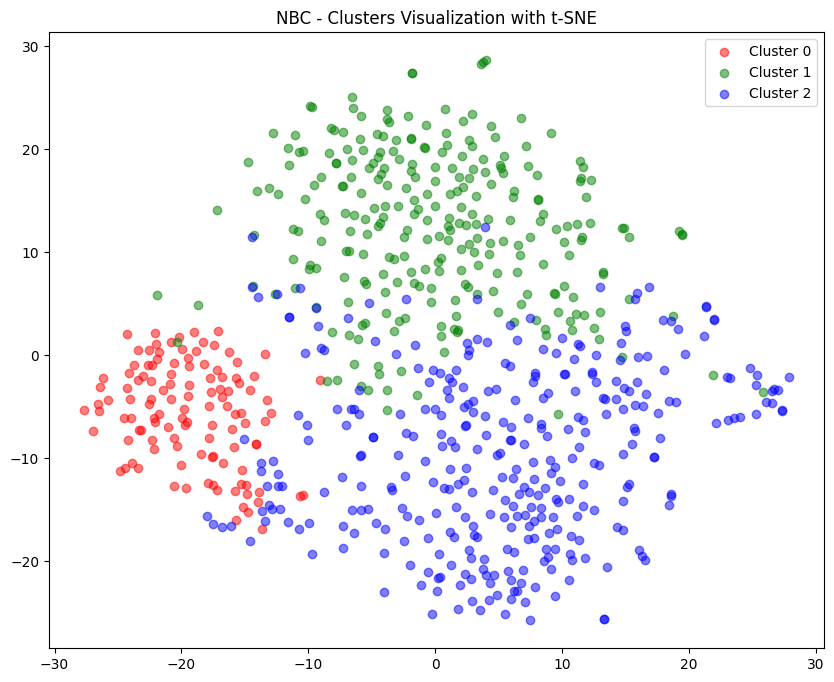

In [4]:
#test NBC
json_file_path = '/content/drive/MyDrive/COMP396/filtered_NBC_video_details.json'
word2vec_model_path = '/content/drive/MyDrive/COMP396/GoogleNews-vectors-negative300.bin'
NBC_kmeans_model, NBC_video_cluster_mapping, NBC_video_vectors = perform_clustering(json_file_path, word2vec_model_path, n_clusters=3)

visualize_clusters(NBC_video_vectors, NBC_kmeans_model.labels_, n_clusters=3, news_channel_name="NBC")

#output_json_path = '/content/drive/MyDrive/COMP396/NBC_clusters_video_ids.json'
#save_clusters_to_json(NBC_video_cluster_mapping, output_json_path)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


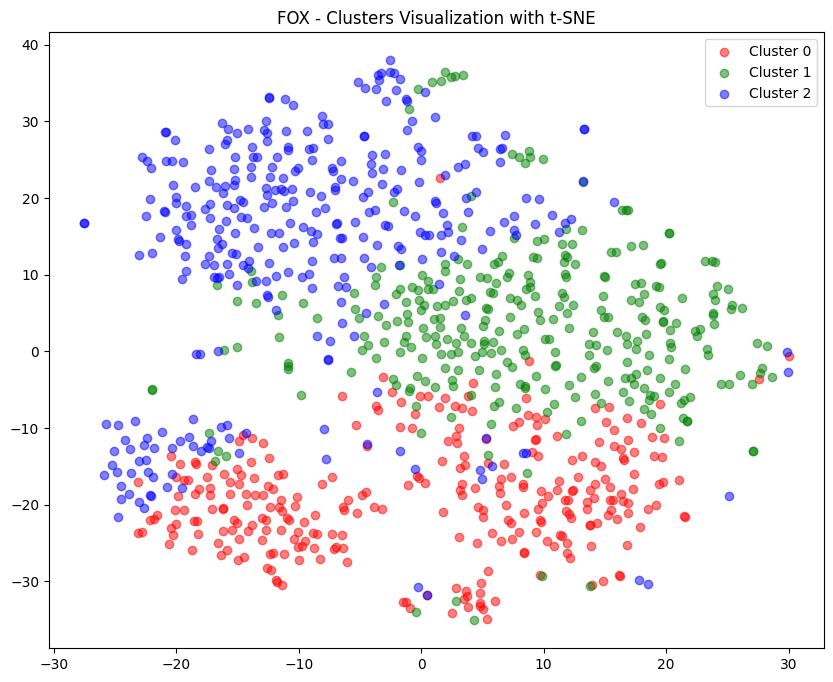

In [5]:
#test FOX
json_file_path = '/content/drive/MyDrive/COMP396/updated_fox_playlist_data.json'
word2vec_model_path = '/content/drive/MyDrive/COMP396/GoogleNews-vectors-negative300.bin'
FOX_kmeans_model,FOXC_video_cluster_mapping, FOX_video_vectors = perform_clustering(json_file_path, word2vec_model_path, n_clusters=3)

visualize_clusters(FOX_video_vectors, FOX_kmeans_model.labels_, n_clusters=3, news_channel_name="FOX")

#output_json_path = '/content/drive/MyDrive/COMP396/FOX_clusters_video_ids.json'
#save_clusters_to_json(FOXC_video_cluster_mapping, output_json_path)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


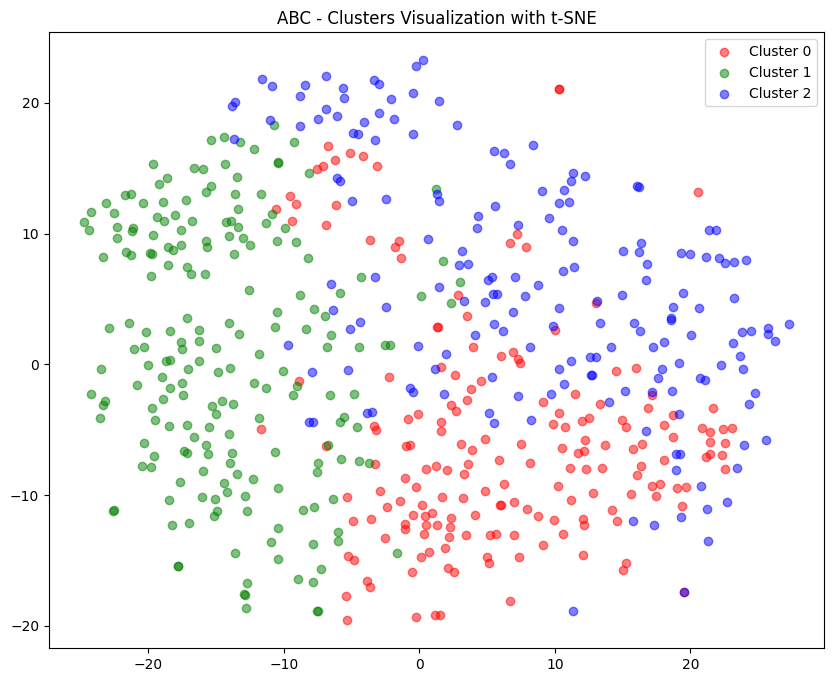

In [6]:
#test ABC
json_file_path = '/content/drive/MyDrive/COMP396/updated_ABC_playlist_data.json'
word2vec_model_path = '/content/drive/MyDrive/COMP396/GoogleNews-vectors-negative300.bin'
ABC_kmeans_model, ABC_video_cluster_mapping, ABC_video_vectors = perform_clustering(json_file_path, word2vec_model_path, n_clusters=3)

visualize_clusters(ABC_video_vectors, ABC_kmeans_model.labels_, n_clusters=3, news_channel_name="ABC")

#output_json_path = '/content/drive/MyDrive/COMP396/FOX_clusters_video_ids.json'
#save_clusters_to_json(ABC_video_cluster_mapping, output_json_path)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


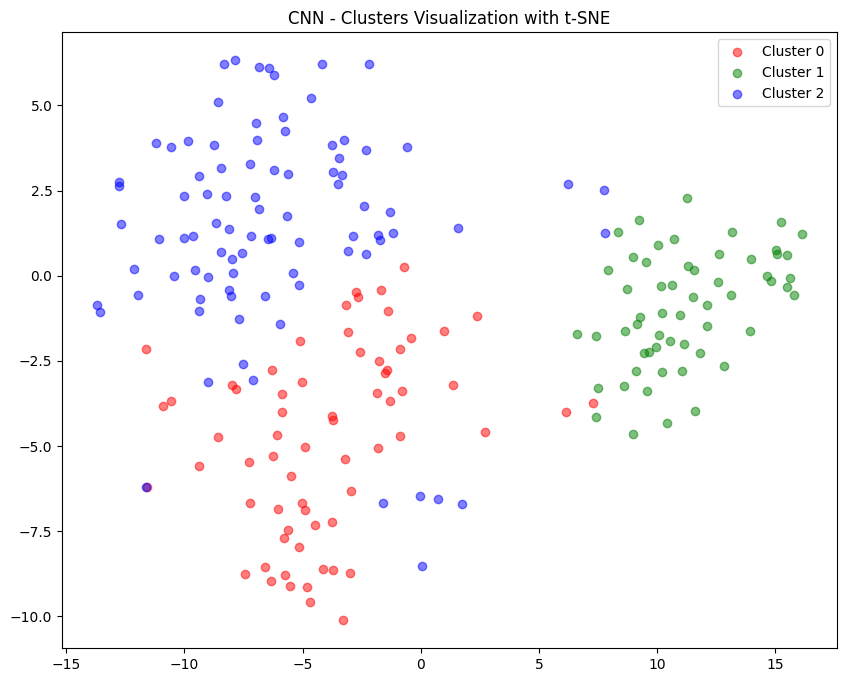

In [7]:
#test CNN
json_file_path = '/content/drive/MyDrive/COMP396/updated_CNN_playlist_data.json'
word2vec_model_path = '/content/drive/MyDrive/COMP396/GoogleNews-vectors-negative300.bin'
CNN_kmeans_model, CNN_video_cluster_mapping, CNN_video_vectors = perform_clustering(json_file_path, word2vec_model_path, n_clusters=3)

visualize_clusters(CNN_video_vectors, CNN_kmeans_model.labels_, n_clusters=3, news_channel_name="CNN")

#output_json_path = '/content/drive/MyDrive/COMP396/CNN_clusters_video_ids.json'
#save_clusters_to_json(CNN_video_cluster_mapping, output_json_path)